# Import and Prepare the Data

In [1]:
# When we work with files in Python we will be using the Pandas library. 
# In order to access different functions and methods inside of the library we must first import it into our project. 
#
import pandas as pd
import numpy as np

In [2]:
# We can use the new 'pd' reference and run the read_csv function from within Pandas to import our data as follows:
# We will name the dataframe 'credit'.
credit = pd.read_csv('default of credit card clients.csv', header =1)
#
# Note that the first row of the data file is excluded.

# Preprocessing

In [3]:
# Use the get_dummies() function within pandas to convert non-numeric columns to a series of binary numeric 'Dummy' columns
credit = pd.get_dummies(credit)
# Print credit
credit

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,39,0,0,0,0,0,0,...,5000,1000,0,1,0,1,0,0,0,1
29996,29997,150000,2,43,-1,-1,-1,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
29997,29998,30000,2,37,4,3,2,-1,0,0,...,2000,3100,0,1,0,0,0,1,1,0
29998,29999,80000,1,41,1,-1,0,0,0,-1,...,52964,1804,0,1,0,1,0,0,1,0


The categorical variables SEX, EDUCATION, default payment are now converted to dummy variables.

In [4]:
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
credit.loc[credit['MARRIAGE'] == 1, 'M_Married'] = 1
credit.loc[credit['MARRIAGE'] != 1, 'M_Married'] = 0
credit.loc[credit['MARRIAGE'] == 2, 'M_Single'] = 1
credit.loc[credit['MARRIAGE'] != 2, 'M_Single'] = 0
credit.loc[credit['MARRIAGE'] == 3, 'M_Divorce'] = 1
credit.loc[credit['MARRIAGE'] != 3, 'M_Divorce'] = 0

Convert Marital status to dummy variables

In [5]:
credit = credit.drop(['ID','SEX_female','EDUCATION_other','default payment next month_not default','MARRIAGE'], axis=1)

We can also use Pandas-Profiling to quickly create an EDA-like report in just one line of code! 
To do this, we'll need to import the pandas-profiling library into work environment.
Go to https://anaconda.org/conda-forge/pandas-profiling for installation instruction

# Pandas-Profiling

In [6]:
# import pandas-profiling library
import pandas_profiling
# Now we can use the library on our data frame
pandas_profiling.ProfileReport(credit)

This is really a great tool to provide basic statistical analyses on all the variables: key summaries and visualization, including graphically shown at least 4 different correlations, pin point the highest pairwise correlated factors, etc.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt # visualize data graphically

# Correlation

Whether addressing collinearity or checking for relationships between features for selection or engineering, calculating correlation is a vital part of all Data Science projects:

In [8]:
# building a basic correlation coefficient matrix using pandas:
# Strength of correlations:
#   Very strong relationship  (|r| >= 0.8)
#   Strong relationship       (|r| >= 0.6)
#   Moderate relationship     (|r| >= 0.4)
#   Weak relationship         (|r| >= 0.2)
#   Very weak relationship    (0< |r|< 0.2)
corrMat = credit.corr()

# Create Pearson correlation matrix visualization, and limit to 2 decimal places:
corrMat.style.background_gradient(cmap='coolwarm').set_precision(2)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_graduate_school,EDUCATION_high_school,EDUCATION_university,default_payment_next_month_default,M_Married,M_Single,M_Divorce
LIMIT_BAL,1.00,0.14,-0.27,-0.30,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22,-0.02,0.26,-0.14,-0.15,-0.15,0.10,-0.09,-0.06
AGE,0.14,1.00,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.09,-0.10,0.23,-0.08,0.01,0.45,-0.47,0.08
PAY_0,-0.27,-0.04,1.00,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.18,0.18,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.06,-0.14,0.06,0.10,0.32,-0.02,0.01,0.02
PAY_2,-0.30,-0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.23,0.24,0.22,0.22,0.22,0.22,-0.08,-0.06,-0.06,-0.05,-0.04,-0.04,0.07,-0.17,0.06,0.12,0.26,-0.02,0.02,0.01
PAY_3,-0.29,-0.05,0.57,0.77,1.00,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.00,-0.07,-0.05,-0.05,-0.04,-0.04,0.07,-0.16,0.06,0.12,0.24,-0.03,0.03,0.02
PAY_4,-0.27,-0.05,0.54,0.66,0.78,1.00,0.82,0.72,0.20,0.23,0.24,0.25,0.24,0.24,-0.01,-0.00,-0.07,-0.04,-0.03,-0.03,0.06,-0.15,0.06,0.11,0.22,-0.03,0.03,0.02
PAY_5,-0.25,-0.05,0.51,0.62,0.69,0.82,1.00,0.82,0.21,0.23,0.24,0.27,0.27,0.26,-0.01,-0.00,0.01,-0.06,-0.03,-0.02,0.06,-0.14,0.05,0.10,0.20,-0.03,0.03,0.01
PAY_6,-0.24,-0.05,0.47,0.58,0.63,0.72,0.82,1.00,0.21,0.23,0.24,0.27,0.29,0.29,-0.00,-0.01,0.01,0.02,-0.05,-0.03,0.04,-0.13,0.04,0.10,0.19,-0.03,0.03,0.02
BILL_AMT1,0.29,0.06,0.19,0.23,0.21,0.20,0.21,0.21,1.00,0.95,0.89,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18,0.03,-0.02,-0.02,0.03,-0.02,0.03,-0.02,-0.01
BILL_AMT2,0.28,0.05,0.19,0.24,0.24,0.23,0.23,0.23,0.95,1.00,0.93,0.89,0.86,0.83,0.28,0.10,0.15,0.15,0.16,0.17,0.03,-0.02,-0.02,0.03,-0.01,0.02,-0.02,-0.01


# CREATE NEW VARIABLES

In [9]:
# create Age_GP by tweenties, thirties, etc
# Use floor_divide by 10 to get the tens, then multiply by 10. 
import numpy as np
credit['AGE_GP'] = np.floor_divide(credit['AGE'],10) * 10
credit['AGE_GP'] 

0        20
1        20
2        30
3        30
4        50
         ..
29995    30
29996    40
29997    30
29998    40
29999    40
Name: AGE_GP, Length: 30000, dtype: int64

In [10]:
# Create a variable TOTAL_BILL as the sum of all the 6 months' BILL_AMTs
credit["TOTAL_BILL"] = credit["BILL_AMT1"]+credit["BILL_AMT2"]+credit["BILL_AMT3"]+credit["BILL_AMT4"]+credit["BILL_AMT5"]+credit["BILL_AMT6"]

In [11]:
# Create a variable TOTAL_PAY as the sum of all the 6 months' PAY_AMTs
credit["TOTAL_PAY"] = credit["PAY_AMT1"]+credit["PAY_AMT2"]+credit["PAY_AMT3"]+credit["PAY_AMT4"]+credit["PAY_AMT5"]+credit["PAY_AMT6"]

In [12]:
credit["AVE_BILL"]=credit["TOTAL_BILL"]/6000

In [13]:
credit["AVE_PAY"] =credit["TOTAL_PAY"]/6000

In [14]:
credit = credit.drop(['TOTAL_PAY','TOTAL_BILL'], axis=1)

In [15]:
# shift pay features for -2 to -1 
# negative pay status indicate good credit: -2 no consumption is NO better than -1 payment in full)                                 
credit['PAY_0']=credit['PAY_0'].replace(-2,-1)
credit['PAY_2']=credit['PAY_2'].replace(-2,-1)
credit['PAY_3']=credit['PAY_3'].replace(-2,-1)
credit['PAY_4']=credit['PAY_4'].replace(-2,-1)
credit['PAY_5']=credit['PAY_5'].replace(-2,-1)
credit['PAY_6']=credit['PAY_6'].replace(-2,-1)

In [16]:
# Add 2 to each PAY_x, so all will be non-negative. 
# Create a variable PAY_STATUS
credit["PAY_STATUS"] = credit["PAY_0"]+credit["PAY_2"]+credit["PAY_3"]+credit["PAY_4"]+credit["PAY_5"]+credit["PAY_6"]

In [17]:
# Create another variable nPAY_STATUS : first assign all non positive of PAY_x as 0, and then sum them up
credit['nPAY_0']=credit['PAY_0'].replace(-1,0)
credit['nPAY_2']=credit['PAY_2'].replace(-1,0)
credit['nPAY_3']=credit['PAY_3'].replace(-1,0)
credit['nPAY_4']=credit['PAY_4'].replace(-1,0)
credit['nPAY_5']=credit['PAY_5'].replace(-1,0)
credit['nPAY_6']=credit['PAY_6'].replace(-1,0)

credit["nPAY_STATUS"] = credit["nPAY_0"]+credit["nPAY_2"]+credit["nPAY_3"]+credit["nPAY_4"]+credit["nPAY_5"]+credit["nPAY_6"]
credit = credit.drop(['nPAY_0','nPAY_2','nPAY_3','nPAY_4','nPAY_5','nPAY_6'], axis=1)

In [18]:
# Create LIMIT_BAL_GP
# Use floor_divide by 100000 
# Create 6 groups
credit['LIMIT_BAL_GP'] = np.floor_divide(credit['LIMIT_BAL'],100000) 
credit.loc[credit['LIMIT_BAL_GP'] == '0', 'LIMIT_BAL_GP'] = 1
credit.loc[credit['LIMIT_BAL_GP'] == '1', 'LIMIT_BAL_GP'] = 2
credit.loc[credit['LIMIT_BAL_GP'] == '2', 'LIMIT_BAL_GP'] = 3
credit.loc[credit['LIMIT_BAL_GP'] == '3', 'LIMIT_BAL_GP'] = 4
credit.loc[credit['LIMIT_BAL_GP'] == '4', 'LIMIT_BAL_GP'] = 5
credit.loc[credit['LIMIT_BAL_GP'] == '5', 'LIMIT_BAL_GP'] = 6
credit.loc[credit['LIMIT_BAL_GP'] == '6', 'LIMIT_BAL_GP'] = 6
credit.loc[credit['LIMIT_BAL_GP'] == '7', 'LIMIT_BAL_GP'] = 6
credit.loc[credit['LIMIT_BAL_GP'] == '8', 'LIMIT_BAL_GP'] = 6
credit.loc[credit['LIMIT_BAL_GP'] == '9', 'LIMIT_BAL_GP'] = 6
credit.loc[credit['LIMIT_BAL_GP'] == '10', 'LIMIT_BAL_GP'] = 6

In [19]:
# Create LIMIT_BAL_GP1
# Reduce LIMIT_BAL_GP from 6 to  4 groups

credit['LIMIT_BAL_GP1'] = np.floor_divide(credit['LIMIT_BAL'],100000)
credit.loc[credit['LIMIT_BAL_GP1'] == '0', 'LIMIT_BAL_GP1'] = 1
credit.loc[credit['LIMIT_BAL_GP1'] == '1', 'LIMIT_BAL_GP1'] = 2
credit.loc[credit['LIMIT_BAL_GP1'] == '2', 'LIMIT_BAL_GP1'] = 3
credit.loc[credit['LIMIT_BAL_GP1'] == '3', 'LIMIT_BAL_GP1'] = 4
credit.loc[credit['LIMIT_BAL_GP1'] == '4', 'LIMIT_BAL_GP1'] = 4
credit.loc[credit['LIMIT_BAL_GP1'] == '5', 'LIMIT_BAL_GP1'] = 4
credit.loc[credit['LIMIT_BAL_GP1'] == '6', 'LIMIT_BAL_GP1'] = 4
credit.loc[credit['LIMIT_BAL_GP1'] == '7', 'LIMIT_BAL_GP1'] = 4
credit.loc[credit['LIMIT_BAL_GP1'] == '8', 'LIMIT_BAL_GP1'] = 4
credit.loc[credit['LIMIT_BAL_GP1'] == '9', 'LIMIT_BAL_GP1'] = 4
credit.loc[credit['LIMIT_BAL_GP1'] == '10', 'LIMIT_BAL_GP1'] = 4

# Looking at Correlation

In [20]:
#look at the correlation of the new data
corrMat1 = credit.corr()
corrMat1.style.background_gradient(cmap='coolwarm').set_precision(2)

In [21]:
#look at the correlation of the new data
col=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default_payment_next_month_default','LIMIT_BAL']
df_corr1=credit[col]
corrMat3 = df_corr1.corr()
corrMat3.style.background_gradient(cmap='coolwarm').set_precision(2)


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default_payment_next_month_default,LIMIT_BAL
BILL_AMT1,1.00,0.95,0.89,0.86,0.83,0.80,-0.02,0.29
BILL_AMT2,0.95,1.00,0.93,0.89,0.86,0.83,-0.01,0.28
BILL_AMT3,0.89,0.93,1.00,0.92,0.88,0.85,-0.01,0.28
BILL_AMT4,0.86,0.89,0.92,1.00,0.94,0.90,-0.01,0.29
BILL_AMT5,0.83,0.86,0.88,0.94,1.00,0.95,-0.01,0.30
BILL_AMT6,0.80,0.83,0.85,0.90,0.95,1.00,-0.01,0.29
default_payment_next_month_default,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,1.00,-0.15
LIMIT_BAL,0.29,0.28,0.28,0.29,0.30,0.29,-0.15,1.00


In [22]:
#look at the correlation of the new data
col=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default_payment_next_month_default','LIMIT_BAL']
df_corr1=credit[col]
corrMat3 = df_corr1.corr()
corrMat3.style.background_gradient(cmap='coolwarm').set_precision(2)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month_default,LIMIT_BAL
PAY_AMT1,1.00,0.29,0.25,0.20,0.15,0.19,-0.07,0.20
PAY_AMT2,0.29,1.00,0.24,0.18,0.18,0.16,-0.06,0.18
PAY_AMT3,0.25,0.24,1.00,0.22,0.16,0.16,-0.06,0.21
PAY_AMT4,0.20,0.18,0.22,1.00,0.15,0.16,-0.06,0.20
PAY_AMT5,0.15,0.18,0.16,0.15,1.00,0.15,-0.06,0.22
PAY_AMT6,0.19,0.16,0.16,0.16,0.15,1.00,-0.05,0.22
default_payment_next_month_default,-0.07,-0.06,-0.06,-0.06,-0.06,-0.05,1.00,-0.15
LIMIT_BAL,0.20,0.18,0.21,0.20,0.22,0.22,-0.15,1.00


In [23]:
#look at the correlation of the new data
col=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default_payment_next_month_default','LIMIT_BAL']
df_corr12=credit[col]
corrMat3 = df_corr12.corr()
corrMat3.style.background_gradient(cmap='coolwarm').set_precision(2)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment_next_month_default,LIMIT_BAL
PAY_0,1.00,0.67,0.55,0.51,0.48,0.44,0.35,-0.25
PAY_2,0.67,1.00,0.72,0.60,0.57,0.52,0.29,-0.28
PAY_3,0.55,0.72,1.00,0.73,0.63,0.58,0.26,-0.27
PAY_4,0.51,0.60,0.73,1.00,0.78,0.67,0.25,-0.26
PAY_5,0.48,0.57,0.63,0.78,1.00,0.77,0.24,-0.24
PAY_6,0.44,0.52,0.58,0.67,0.77,1.00,0.22,-0.23
default_payment_next_month_default,0.35,0.29,0.26,0.25,0.24,0.22,1.00,-0.15
LIMIT_BAL,-0.25,-0.28,-0.27,-0.26,-0.24,-0.23,-0.15,1.00


# Machine Learning Model

In [26]:
# Use LIMIT_BAL,AGE,AVE_BILL,AVE_PAY,PAY_STATUS,M_Married,M_Single,M_Divorce,EDUCATION_graduate_school,EDUCATION_university,SEX_male as Features
feature_col = ['LIMIT_BAL','AGE','AVE_BILL','AVE_PAY','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','SEX_male']
X=credit[feature_col]
y=credit['default_payment_next_month_default']

In [27]:
X.head(5)

,LIMIT_BAL,AGE,AVE_BILL,AVE_PAY,PAY_STATUS,M_Married,M_Single,M_Divorce,EDUCATION_graduate_school,EDUCATION_university,SEX_male
0,20000,24,1.284000,0.114833,0,1.0,0.0,0.0,0,1,0
1,120000,26,2.846167,0.833333,3,0.0,1.0,0.0,0,1,0
2,90000,34,16.942167,1.836333,0,0.0,1.0,0.0,0,1,0
3,50000,37,38.555667,1.398000,0,1.0,0.0,0.0,0,1,0
4,50000,57,18.223167,9.841500,-2,1.0,0.0,0.0,0,1,1


In [28]:
# Split X and y into 75% training and 25% testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 12)

In [29]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(22500, 11)
(7500, 11)


In [30]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(22500,)
(7500,)


# Logistic regression

In [31]:
# train a logistic regression model on the training set
# import the Logistic Regression class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# train the model on the training set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# make predictions on the testing set and store the predicted response values
y_pred = logreg.predict(X_test)

# Evaluate model

In [33]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f'% accuracy)

Accuracy: 0.777


In [34]:
# calculate MAE using scikit-learn
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %5.3f'% mae)

Mean Absolute Error: 56.950


In [35]:
import numpy as np
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %6.3f'% rmse)

Root Mean Squared Error:  0.473


In [36]:
from sklearn.metrics import r2_score
predRsquared = r2_score(y_test, y_pred, multioutput='variance_weighted')
print('R-squared: %.3f'% predRsquared)

R-squared: -0.288


r squared value is negative mean either regression line is worse than using the mean value, or cause by the intercept

In [37]:
# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 0 FalsePositive : 0
FalseNegative : 1675 TrueNegative  : 5825
Accuracy: 0.777 ,        Misclassification Rate: 0.223
Sensitivity: 0.000 ,  Specificity: 1.000
False Positive Rate: 0.000 , Precision: nan


Sensitivity is 0. Did not predict any positive. Need to consider other model.

# Try another features

In [38]:
# Use LIMIT_BAL,AGE,BILL_AMT4,PAY_AMT4,PAY_STATUS,M_Married,M_Single,M_Divorce,EDUCATION_graduate_school,EDUCATION_university,SEX_male as Features
feature_col1 = ['LIMIT_BAL','AGE','BILL_AMT4','PAY_AMT4','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','SEX_male']
X1=credit[feature_col1]
y1=credit['default_payment_next_month_default']

Increase training size to 80%

In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state= 12)

In [40]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# train the model on the training set
logreg.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# make predictions on the testing set and store the predicted response values
y1_pred = logreg.predict(X1_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y1_test, y1_pred)
mae = metrics.mean_absolute_error(y1_test, y1_pred)
rmse = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
r_square = r2_score(y1_test, y1_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

Accuracy: 0.775 , Mean Absolute Error: 57.460 , Root Mean Squared Error:  0.475 , R-squared: -0.291


In [42]:
# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y1_test, y1_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 0 FalsePositive : 0
FalseNegative : 1352 TrueNegative  : 4648
Accuracy: 0.775 ,        Misclassification Rate: 0.225
Sensitivity: 0.000 ,  Specificity: 1.000
False Positive Rate: 0.000 , Precision: nan


Model is not better than the earlier one.

In [43]:
# remove gender
feature_col2 = ['LIMIT_BAL','AGE','AVE_BILL','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school']
X2=credit[feature_col2]
y2=credit['default_payment_next_month_default']


In [44]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state= 11)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# train the model on the training set
logreg.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# make predictions on the testing set and store the predicted response values
y2_pred = logreg.predict(X2_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y2_test, y2_pred)
mae = metrics.mean_absolute_error(y2_test, y2_pred)
rmse = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))
r_square = r2_score(y2_test, y2_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

Accuracy: 0.774 , Mean Absolute Error: 57.489 , Root Mean Squared Error:  0.475 , R-squared: -0.291


In [46]:
# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y2_test, y2_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 3 FalsePositive : 2
FalseNegative : 2029 TrueNegative  : 6966
Accuracy: 0.774 ,        Misclassification Rate: 0.226
Sensitivity: 0.001 ,  Specificity: 1.000
False Positive Rate: 0.000 , Precision: 0.600


Gender is a key variable, cannot drop. No positive cases predicted

In [47]:
# Change BILL_AMT4 to BILL_AMT1, PAY_AMT4 to PAY_AMT1
feature_col3 = ['LIMIT_BAL','AGE','BILL_AMT1','PAY_AMT1','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','SEX_male']
X3=credit[feature_col3]
y3=credit['default_payment_next_month_default']

In [48]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state= 11)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# train the model on the training set
logreg.fit(X3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# make predictions on the testing set and store the predicted response values
y3_pred = logreg.predict(X3_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y3_test, y3_pred)
mae = metrics.mean_absolute_error(y3_test, y3_pred)
rmse = np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))
r_square = r2_score(y3_test, y3_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

Accuracy: 0.773 , Mean Absolute Error: 57.758 , Root Mean Squared Error:  0.476 , R-squared: -0.293


In [50]:
# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y3_test, y3_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 0 FalsePositive : 0
FalseNegative : 1359 TrueNegative  : 4641
Accuracy: 0.773 ,        Misclassification Rate: 0.227
Sensitivity: 0.000 ,  Specificity: 1.000
False Positive Rate: 0.000 , Precision: nan


In [51]:
#change LIMIT_BAL to LIMT_BAL_GP
feature_col4 = ['LIMIT_BAL_GP','AGE','AVE_BILL','AVE_PAY','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','SEX_male']
X4=credit[feature_col4]
y4=credit['default_payment_next_month_default']

In [52]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state= 0)

# train the model on the training set
logreg.fit(X4_train, y4_train)

# make predictions on the testing set and store the predicted response values
y4_pred = logreg.predict(X4_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y4_test, y4_pred)
mae = metrics.mean_absolute_error(y4_test, y4_pred)
rmse = np.sqrt(metrics.mean_squared_error(y4_test, y4_pred))
r_square = r2_score(y4_test, y4_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y4_test, y4_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

Accuracy: 0.806 , Mean Absolute Error: 44.306 , Root Mean Squared Error:  0.441 , R-squared: -0.147
TruePositive  : 255 FalsePositive : 124
FalseNegative : 1042 TrueNegative  : 4579
Accuracy: 0.806 ,        Misclassification Rate: 0.194
Sensitivity: 0.197 ,  Specificity: 0.974
False Positive Rate: 0.026 , Precision: 0.673


In [53]:
# Use AGE_GP
feature_col5 = ['LIMIT_BAL_GP','AGE_GP','AVE_BILL','AVE_PAY','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','SEX_male']
X5=credit[feature_col5]
y5=credit['default_payment_next_month_default']

In [54]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state= 112)

# train the model on the training set
logreg.fit(X5_train, y5_train)

# make predictions on the testing set and store the predicted response values
y5_pred = logreg.predict(X5_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y5_test, y5_pred)
mae = metrics.mean_absolute_error(y5_test, y5_pred)
rmse = np.sqrt(metrics.mean_squared_error(y5_test, y5_pred))
r_square = r2_score(y5_test, y5_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y5_test, y5_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

Accuracy: 0.800 , Mean Absolute Error: 45.468 , Root Mean Squared Error:  0.447 , R-squared: -0.155
TruePositive  : 395 FalsePositive : 192
FalseNegative : 1604 TrueNegative  : 6809
Accuracy: 0.800 ,        Misclassification Rate: 0.200
Sensitivity: 0.198 ,  Specificity: 0.973
False Positive Rate: 0.027 , Precision: 0.673


In [55]:
# Change LIMIT_BAL to LIMIT_BAL_GP1 
feature_col6 = ['LIMIT_BAL_GP1','AGE','AVE_BILL','AVE_PAY','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','SEX_male']
X6=credit[feature_col6]
y6=credit['default_payment_next_month_default']

In [57]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.4, random_state= 112)

# train the model on the training set
logreg.fit(X6_train, y6_train)

# make predictions on the testing set and store the predicted response values
y6_pred = logreg.predict(X6_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y6_test, y6_pred)
mae = metrics.mean_absolute_error(y6_test, y6_pred)
rmse = np.sqrt(metrics.mean_squared_error(y6_test, y6_pred))
r_square = r2_score(y6_test, y6_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y6_test, y6_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

Accuracy: 0.799 , Mean Absolute Error: 45.265 , Root Mean Squared Error:  0.448 , R-squared: -0.160
TruePositive  : 545 FalsePositive : 282
FalseNegative : 2129 TrueNegative  : 9044
Accuracy: 0.799 ,        Misclassification Rate: 0.201
Sensitivity: 0.204 ,  Specificity: 0.970
False Positive Rate: 0.030 , Precision: 0.659


In [58]:
# Change AVE_PAY and AVE_BILL to Month 4th PAY and BILL
feature_col7 = ['LIMIT_BAL_GP1','AGE','BILL_AMT4','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','SEX_male']
X7=credit[feature_col7]
y7=credit['default_payment_next_month_default']

In [59]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state= 112)

# train the model on the training set
logreg.fit(X7_train, y7_train)

# make predictions on the testing set and store the predicted response values
y7_pred = logreg.predict(X7_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y7_test, y7_pred)
mae = metrics.mean_absolute_error(y7_test, y7_pred)
rmse = np.sqrt(metrics.mean_squared_error(y7_test, y7_pred))
r_square = r2_score(y7_test, y7_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y7_test, y7_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

Accuracy: 0.803 , Mean Absolute Error: 43.249 , Root Mean Squared Error:  0.443 , R-squared: -0.160
TruePositive  : 279 FalsePositive : 162
FalseNegative : 1017 TrueNegative  : 4542
Accuracy: 0.803 ,        Misclassification Rate: 0.197
Sensitivity: 0.215 ,  Specificity: 0.966
False Positive Rate: 0.034 , Precision: 0.633


# K nearest neighbors

In [60]:
#Import the KNeighborsClassifier class 
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (using the value K=3)
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model with data
knn.fit(X4_train, y4_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
# store the predicted response values
y4_pred = knn.predict(X4_test)
print(metrics.accuracy_score(y4_test, y4_pred))

0.7616666666666667


In [62]:
# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y4_test, y4_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 384 FalsePositive : 517
FalseNegative : 913 TrueNegative  : 4186
Accuracy: 0.762 ,        Misclassification Rate: 0.238
Sensitivity: 0.296 ,  Specificity: 0.890
False Positive Rate: 0.110 , Precision: 0.426


In [63]:
# Repeat for KNN with K=5:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X4_train, y4_train)
y4_pred = knn.predict(X4_test)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y4_test, y4_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
# Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)
Accuracy = metrics.accuracy_score(y4_test, y4_pred)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
# Precision = TruePositive / float(TruePositive + FalsePositive)
Precision = metrics.precision_score(y4_test, y4_pred)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 376 FalsePositive : 389
FalseNegative : 921 TrueNegative  : 4314
Accuracy: 0.782 ,        Misclassification Rate: 0.218
Sensitivity: 0.290 ,  Specificity: 0.917
False Positive Rate: 0.083 , Precision: 0.492


In [64]:
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X4_train, y4_train)
    y_pred = knn.predict(X4_test)
    scores.append(metrics.accuracy_score(y4_test, y4_pred))

Text(0, 0.5, 'Testing Accuracy')

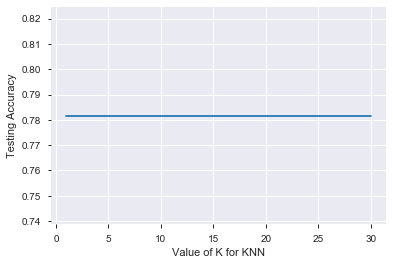

In [65]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [67]:
# Repeat for KNN with K=25:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X4_train, y4_train)
y4_pred = knn.predict(X4_test)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y4_test, y4_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
# Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)
Accuracy = metrics.accuracy_score(y4_test, y4_pred)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 347 FalsePositive : 203
FalseNegative : 950 TrueNegative  : 4500
Accuracy: 0.808 ,        Misclassification Rate: 0.192
Sensitivity: 0.268 ,  Specificity: 0.957
False Positive Rate: 0.043 , Precision: 0.631


# K-fold cross-validation

In [68]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=25)
scores = cross_val_score(knn, X4, y4, cv=10, scoring='accuracy')
print(scores)

[0.78666667 0.79966667 0.806      0.79466667 0.79733333 0.80233333
 0.81166667 0.807      0.80533333 0.809     ]


In [69]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.8019666666666666


In [70]:
# search for an optimal value of K for KNN
k_range = list(range(10, 30))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X4, y4, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7955, 0.7961, 0.7970666666666667, 0.7963666666666667, 0.7975, 0.7983, 0.7987, 0.7989333333333334, 0.7996000000000001, 0.7991666666666667, 0.7997333333333334, 0.8006666666666666, 0.8002666666666667, 0.8012666666666668, 0.8007666666666667, 0.8019666666666666, 0.8016333333333334, 0.8020999999999999, 0.8022333333333334, 0.8021333333333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

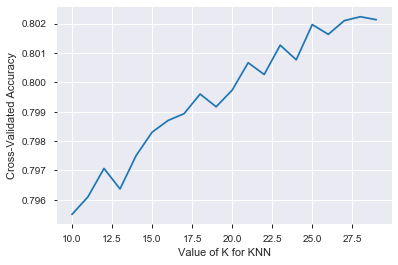

In [71]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [72]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=28)
print(cross_val_score(knn, X4, y4, cv=10, scoring='accuracy').mean())

0.8022333333333334


In [73]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X4, y4, cv=10, scoring='accuracy').mean())

0.8015666666666666


In [74]:
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X4, y4 = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

In [75]:
# Create the RFE object and compute a cross-validated score.
from sklearn.svm import SVC
svc = SVC(kernel="linear")

In [76]:
# The "accuracy" scoring is proportional to the number of correct classifications
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')

In [77]:
rfecv.fit(X4, y4)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [78]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 3


In [79]:
#print('Best features :', X.columns[rfecv.support_])
#print('Original features :', X.columns)
np.absolute(rfecv.estimator_.coef_)


array([[1.90074734, 1.27011483, 0.63054915],
       [1.4198432 , 1.33377076, 2.04608849],
       [0.52454801, 0.90961799, 2.61130562],
       [0.25262224, 2.13019035, 0.97159859],
       [1.34807541, 1.29941883, 1.37927136],
       [0.52748414, 0.56992839, 1.74987749],
       [0.6879391 , 1.00953845, 2.24866411],
       [0.79077401, 0.97890999, 0.99054639],
       [0.26952805, 0.15013532, 2.36682247],
       [1.71831013, 1.28509324, 0.0209532 ],
       [1.36838442, 1.93361043, 0.74863695],
       [0.35028391, 1.0437967 , 1.78099519],
       [0.34656805, 0.97406601, 1.57176936],
       [1.08583112, 0.27923935, 1.03838738],
       [0.2213938 , 1.28214145, 1.7499249 ],
       [0.95830816, 0.38895409, 1.52534359],
       [0.19657182, 1.85161909, 0.38970362],
       [0.20574579, 1.34657   , 0.30859452],
       [0.12289207, 0.74699522, 2.19153292],
       [0.68325034, 0.89436059, 1.69547227],
       [1.00989789, 0.89840499, 1.38282794],
       [0.12988753, 1.41572958, 1.47265115],
       [2.

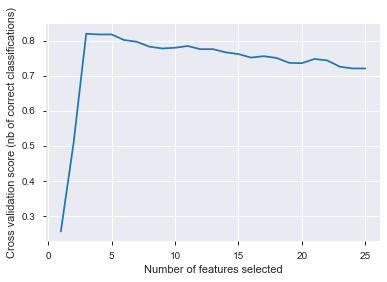

In [161]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [98]:
df_gp = credit[(credit["LIMIT_BAL_GP"] == 1)]
df_gp.tail(5)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,M_Married,M_Single,M_Divorce,AGE_GP,AVE_BILL,AVE_PAY,PAY_STATUS,nPAY_STATUS,LIMIT_BAL_GP,LIMIT_BAL_GP1
29987,130000,34,0,0,0,0,0,0,23292,14077,...,0.0,1.0,0.0,30,58.670500,18.505333,0,0,1,1
29989,150000,35,-1,-1,-1,-1,-1,-1,3425,9009,...,0.0,1.0,0.0,30,2.201833,1.639500,-6,0,1,1
29990,140000,41,0,0,0,0,0,0,138325,137142,...,1.0,0.0,0.0,40,108.105833,3.788833,0,0,1,1
29993,100000,38,0,-1,-1,0,0,0,3042,1427,...,0.0,1.0,0.0,30,50.428000,20.797333,-2,0,1,1
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0.0,1.0,0.0,40,3.530333,2.415000,-4,0,1,1


In [82]:
feature_gp = ['AGE','AVE_BILL','AVE_PAY','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','SEX_male']
Xgp = df_gp[feature_gp]
ygp = df_gp['default_payment_next_month_default']

In [102]:
Xgp_train, Xgp_test, ygp_train, ygp_test = train_test_split(Xgp, ygp, test_size=0.4, random_state= 0)

# train the model on the training set
logreg.fit(Xgp_train, ygp_train)

# make predictions on the testing set and store the predicted response values
ygp_pred = logreg.predict(Xgp_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(ygp_test, ygp_pred)
mae = metrics.mean_absolute_error(ygp_test, ygp_pred)
rmse = np.sqrt(metrics.mean_squared_error(ygp_test, ygp_pred))
r_square = r2_score(ygp_test, ygp_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(ygp_test, ygp_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

Accuracy: 0.809 , Mean Absolute Error: 43.783 , Root Mean Squared Error:  0.437 , R-squared: -0.133
TruePositive  : 127 FalsePositive : 57
FalseNegative : 508 TrueNegative  : 2268
Accuracy: 0.809 ,        Misclassification Rate: 0.191
Sensitivity: 0.200 ,  Specificity: 0.975
False Positive Rate: 0.025 , Precision: 0.690


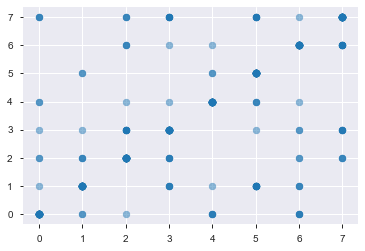

In [84]:
plt.scatter(ygp_test, ygp_pred,  alpha =0.5)

In [112]:
df_gp1 = credit[(credit["LIMIT_BAL_GP"] == 2)]
df_gp1.tail(5)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,M_Married,M_Single,M_Divorce,AGE_GP,AVE_BILL,AVE_PAY,PAY_STATUS,nPAY_STATUS,LIMIT_BAL_GP,LIMIT_BAL_GP1
29975,220000,41,0,0,-1,-1,-1,-1,45075,8840,...,1.0,0.0,0.0,40,10.7985,5.335333,-4,0,2,2
29985,240000,30,-1,-1,-1,-1,-1,-1,0,0,...,0.0,1.0,0.0,30,0.0000,0.000000,-6,0,2,2
29988,250000,34,0,0,0,0,0,0,279640,252913,...,1.0,0.0,0.0,30,229.3450,16.970000,0,0,2,2
29991,210000,34,3,2,2,2,2,2,2500,2500,...,1.0,0.0,0.0,30,2.5000,0.000000,13,13,2,2
29995,220000,39,0,0,0,0,0,0,188948,192815,...,1.0,0.0,0.0,30,120.8915,7.091667,0,0,2,2


In [115]:
Xgp1 = df_gp1[feature_gp]
ygp1 = df_gp1['default_payment_next_month_default']

In [120]:
Xgp1_train, Xgp1_test, ygp1_train, ygp1_test = train_test_split(Xgp1, ygp1, test_size=0.25, random_state= 0)

# train the model on the training set
logreg.fit(Xgp1_train, ygp1_train)

# make predictions on the testing set and store the predicted response values
ygp1_pred = logreg.predict(Xgp1_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(ygp1_test, ygp1_pred)
mae = metrics.mean_absolute_error(ygp1_test, ygp1_pred)
rmse = np.sqrt(metrics.mean_squared_error(ygp1_test, ygp1_pred))
r_square = r2_score(ygp1_test, ygp1_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(ygp1_test, ygp1_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

Accuracy: 0.859 , Mean Absolute Error: 34.479 , Root Mean Squared Error:  0.376 , R-squared: -0.117
TruePositive  : 20 FalsePositive : 9
FalseNegative : 204 TrueNegative  : 1276
Accuracy: 0.859 ,        Misclassification Rate: 0.141
Sensitivity: 0.089 ,  Specificity: 0.993
False Positive Rate: 0.007 , Precision: 0.690


In [100]:
df_gp2 = credit[(credit["LIMIT_BAL_GP"] == 3) | (credit["LIMIT_BAL_GP"] == 4)]
df_gp2.tail(5)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,M_Married,M_Single,M_Divorce,AGE_GP,AVE_BILL,AVE_PAY,PAY_STATUS,nPAY_STATUS,LIMIT_BAL_GP,LIMIT_BAL_GP1
29964,360000,31,-1,-1,-1,0,0,-1,735,51,...,0.0,1.0,0.0,30,9.925833,4.146667,-4,0,3,3
29970,360000,34,-1,-1,-1,0,0,-1,33654,52686,...,1.0,0.0,0.0,30,37.929500,27.018333,-4,0,3,3
29977,420000,34,0,0,0,0,0,0,131939,136721,...,0.0,1.0,0.0,30,140.526500,5.933333,0,0,4,4
29978,310000,39,0,0,0,0,0,0,238973,237196,...,1.0,0.0,0.0,30,226.107833,9.237333,0,0,3,3
29986,360000,35,-1,-1,-1,-1,-1,-1,2220,0,...,0.0,1.0,0.0,30,0.370000,0.000000,-6,0,3,3


In [121]:
Xgp2 = df_gp2[feature_gp]
ygp2 = df_gp2['default_payment_next_month_default']

In [128]:
Xgp2_train, Xgp2_test, ygp2_train, ygp2_test = train_test_split(Xgp2, ygp2, test_size=0.2, random_state= 1)

# train the model on the training set
logreg.fit(Xgp2_train, ygp2_train)

# make predictions on the testing set and store the predicted response values
ygp2_pred = logreg.predict(Xgp2_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(ygp2_test, ygp2_pred)
mae = metrics.mean_absolute_error(ygp2_test, ygp2_pred)
rmse = np.sqrt(metrics.mean_squared_error(ygp2_test, ygp2_pred))
r_square = r2_score(ygp2_test, ygp2_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(ygp2_test, ygp2_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

Accuracy: 0.871 , Mean Absolute Error: 32.561 , Root Mean Squared Error:  0.359 , R-squared: -0.122
TruePositive  : 4 FalsePositive : 1
FalseNegative : 107 TrueNegative  : 726
Accuracy: 0.871 ,        Misclassification Rate: 0.129
Sensitivity: 0.036 ,  Specificity: 0.999
False Positive Rate: 0.001 , Precision: 0.800


In [129]:
df_gp3 = credit[(credit["LIMIT_BAL_GP"] == 5) | (credit["LIMIT_BAL_GP"] == 6)]
df_gp3.tail(5)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,M_Married,M_Single,M_Divorce,AGE_GP,AVE_BILL,AVE_PAY,PAY_STATUS,nPAY_STATUS,LIMIT_BAL_GP,LIMIT_BAL_GP1
29861,650000,44,-1,-1,-1,-1,-1,-1,2119,5094,...,1.0,0.0,0.0,40,3.778500,4.022167,-6,0,6,6
29886,630000,46,0,0,0,0,0,0,125975,91247,...,1.0,0.0,0.0,40,116.203000,17.449500,0,0,6,6
29943,500000,38,0,0,0,0,-1,0,31504,27546,...,0.0,1.0,0.0,30,19.043833,7.595500,-1,0,5,5
29957,500000,31,0,0,-1,0,0,0,29566,25560,...,0.0,1.0,0.0,30,134.188667,54.243833,-1,0,5,5
29963,610000,31,0,-1,2,-1,-1,-1,348392,322228,...,0.0,1.0,0.0,30,309.226333,235.888833,-2,2,6,6


In [130]:
Xgp3 = df_gp3[feature_gp]
ygp3 = df_gp3['default_payment_next_month_default']

In [137]:
Xgp3_train, Xgp3_test, ygp3_train, ygp3_test = train_test_split(Xgp3, ygp3, test_size=0.2, random_state= 19)

# train the model on the training set
logreg.fit(Xgp3_train, ygp3_train)

# make predictions on the testing set and store the predicted response values
ygp3_pred = logreg.predict(Xgp3_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(ygp3_test, ygp3_pred)
mae = metrics.mean_absolute_error(ygp3_test, ygp3_pred)
rmse = np.sqrt(metrics.mean_squared_error(ygp3_test, ygp3_pred))
r_square = r2_score(ygp3_test, ygp3_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(ygp3_test, ygp3_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

Accuracy: 0.906 , Mean Absolute Error: 24.083 , Root Mean Squared Error:  0.307 , R-squared: -0.104
TruePositive  : 0 FalsePositive : 0
FalseNegative : 17 TrueNegative  : 163
Accuracy: 0.906 ,        Misclassification Rate: 0.094
Sensitivity: 0.000 ,  Specificity: 1.000
False Positive Rate: 0.000 , Precision: nan


In [138]:
print(ygp3_pred.shape)
print(ygp3_test.shape)

(180,)
(180,)


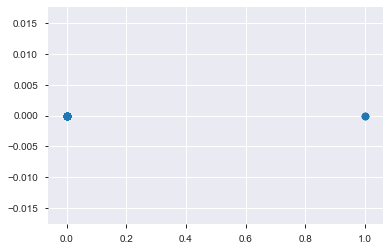

In [139]:
plt.scatter(ygp3_test, ygp3_pred,  alpha =0.5)

In [147]:
# Change PAY_STATUS to nPAY_STATUS
feature_gp4 = ['LIMIT_BAL_GP','AGE','AVE_BILL','AVE_PAY','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','SEX_male']
X8=credit[feature_gp4]
y8=credit['default_payment_next_month_default']

In [148]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state= 11)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# train the model on the training set
logreg.fit(X8_train, y8_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
# make predictions on the testing set and store the predicted response values
y8_pred = logreg.predict(X8_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y8_test, y8_pred)
mae = metrics.mean_absolute_error(y8_test, y8_pred)
rmse = np.sqrt(metrics.mean_squared_error(y8_test, y8_pred))
r_square = r2_score(y8_test, y8_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

Accuracy: 0.797 , Mean Absolute Error: 45.726 , Root Mean Squared Error:  0.451 , R-squared: -0.162


In [150]:
# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y8_test, y8_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 419 FalsePositive : 215
FalseNegative : 1613 TrueNegative  : 6753
Accuracy: 0.797 ,        Misclassification Rate: 0.203
Sensitivity: 0.206 ,  Specificity: 0.969
False Positive Rate: 0.031 , Precision: 0.661


In [157]:
# Change PAY_STATUS to nPAY_STATUS
feature_gp5 = ['LIMIT_BAL_GP1','AGE','AVE_BILL','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','PAY_STATUS','M_Married','M_Single','M_Divorce','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','SEX_male']
X9=credit[feature_gp5]
y9=credit['default_payment_next_month_default']

In [158]:
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state= 11)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# train the model on the training set
logreg.fit(X9_train, y9_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
# make predictions on the testing set and store the predicted response values
y9_pred = logreg.predict(X9_test)

# compare actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y9_test, y9_pred)
mae = metrics.mean_absolute_error(y9_test, y9_pred)
rmse = np.sqrt(metrics.mean_squared_error(y9_test, y9_pred))
r_square = r2_score(y9_test, y9_pred, multioutput='variance_weighted')
print('Accuracy: %.3f'% accuracy,', Mean Absolute Error: %5.3f'% mae,', Root Mean Squared Error: %6.3f'%rmse, ', R-squared: %.3f'% r_square)

Accuracy: 0.794 , Mean Absolute Error: 45.051 , Root Mean Squared Error:  0.454 , R-squared: -0.177


In [160]:
# Metrics from Confusion matrix 
confusion = metrics.confusion_matrix(y8_test, y8_pred)
TruePositive = confusion[1, 1]
TrueNegative = confusion[0, 0]
FalsePositive = confusion[0, 1]
FalseNegative = confusion[1, 0]

# Classification Accuracy: how often is the classifier correct?
Accuracy = (TruePositive + TrueNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# Misclassification Rate or classification error: how often is the classifier incorrect
Misclassification = (FalsePositive + FalseNegative) / float(TruePositive + FalsePositive + TrueNegative + FalseNegative)

# How often is the prediction correct when the actual value is positive?
Sensitivity =  TruePositive  / float(TruePositive + FalseNegative)

# How often is the prediction correct when the actual value is negative?
Specificity = TrueNegative / float(TrueNegative + FalsePositive)

# How often is the prediction incorrect when the actual value is negative?
FalsePositiveRate = FalsePositive / float(FalsePositive + TrueNegative)

# When a positive value is predicted, how often is the prediction correct?
Precision = TruePositive / float(TruePositive + FalsePositive)

print('TruePositive  : %d' %TruePositive , 'FalsePositive : %d'% FalsePositive)
print('FalseNegative : %d' %FalseNegative, 'TrueNegative  : %d'% TrueNegative)
print('Accuracy: %.3f'% Accuracy,',        Misclassification Rate: %.3f'% Misclassification)
print('Sensitivity: %.3f'% Sensitivity, ',  Specificity: %.3f'% Specificity)
print('False Positive Rate: %.3f'% FalsePositiveRate, ', Precision: %.3f'% Precision)

TruePositive  : 419 FalsePositive : 215
FalseNegative : 1613 TrueNegative  : 6753
Accuracy: 0.797 ,        Misclassification Rate: 0.203
Sensitivity: 0.206 ,  Specificity: 0.969
False Positive Rate: 0.031 , Precision: 0.661
